In [ ]:
 !pip install langdetect

In [ ]:
!pip install translate

In [ ]:
pip install https://github.com/MartinoMensio/spacy-universal-sentence-encoder/releases/download/v0.4.3/en_use_md-0.4.3.tar.gz#en_use_md-0.4.3

In [ ]:
!pip install googletrans

In [ ]:
!pip install textblob

In [ ]:
!pip install goslate

In [ ]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
from nltk.stem import WordNetLemmatizer
import spacy
from collections import Counter
from translate import Translator
import seaborn as sns  
sns.set(color_codes=True)
%matplotlib inline 
from matplotlib import pyplot as plt
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
import goslate

In [ ]:
import langdetect

In [ ]:
from langdetect import detect

In [ ]:
import nltk
nltk.download('stopwords')
import nltk
nltk.download('punkt')
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/input_data-1.xlsx')
df.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [ ]:
df.shape

(8500, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


In [ ]:
df.describe().transpose()

,count,unique,top,freq
Short description,8492,7481,password reset,38
Description,8499,7817,the,56
Caller,8500,2950,bpctwhsn kzqsbmtp,810
Assignment group,8500,74,GRP_0,3976


In [ ]:
df.isnull().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

In [ ]:
nan_values = df[df.isna().any(axis=1)]
nan_values

,Short description,Description,Caller,Assignment group
2604,NaN,\r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail...,ohdrnswl rezuibdt,GRP_34
3383,NaN,\r\n-connected to the user system using teamvi...,qftpazns fxpnytmk,GRP_0
3906,NaN,-user unable tologin to vpn.\r\n-connected to...,awpcmsey ctdiuqwe,GRP_0
3910,NaN,-user unable tologin to vpn.\r\n-connected to...,rhwsmefo tvphyura,GRP_0
3915,NaN,-user unable tologin to vpn.\r\n-connected to...,hxripljo efzounig,GRP_0
3921,NaN,-user unable tologin to vpn.\r\n-connected to...,cziadygo veiosxby,GRP_0
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...,wvqgbdhm fwchqjor,GRP_0
4341,NaN,\r\n\r\nreceived from: eqmuniov.ehxkcbgj@gmail...,eqmuniov ehxkcbgj,GRP_0
4395,i am locked out of skype,NaN,viyglzfo ajtfzpkb,GRP_0


In [ ]:
#df.dropna(inplace = True)
df = df.fillna('and')

In [ ]:
df.isnull().sum()

Short description    0
Description          0
Caller               0
Assignment group     0
dtype: int64

In [ ]:
df.shape

(8500, 4)

In [ ]:
# Selecting duplicate rows 
duplicate = df[df.duplicated()]
  
print("Duplicate Rows :")
  
# Print the resultant dataframe
duplicate

Duplicate Rows :


,Short description,Description,Caller,Assignment group
51,call for ecwtrjnq jpecxuty,call for ecwtrjnq jpecxuty,olckhmvx pcqobjnd,GRP_0
229,call for ecwtrjnq jpecxuty,call for ecwtrjnq jpecxuty,olckhmvx pcqobjnd,GRP_0
493,ticket update on inplant_872730,ticket update on inplant_872730,fumkcsji sarmtlhy,GRP_0
512,blank call //gso,blank call //gso,rbozivdq gmlhrtvp,GRP_0
667,job bkbackup_tool_powder_prod_full failed in j...,received from: monitoring_tool@company.com\r\n...,bpctwhsn kzqsbmtp,GRP_8
...,...,...,...,...
7836,probleme mit erpgui \tmqfjard qzhgdoua,probleme mit erpgui \tmqfjard qzhgdoua,tmqfjard qzhgdoua,GRP_24
8051,issue on pricing in distributor_tool,we have agreed price with many of the distribu...,hbmwlprq ilfvyodx,GRP_21
8093,reset passwords for prgthyuulla ramdntythanjes...,the,boirqctx bkijgqry,GRP_17
8347,blank call // loud noise,blank call // loud noise,rbozivdq gmlhrtvp,GRP_0


In [ ]:
df.drop_duplicates()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0
...,...,...,...,...
8495,emails not coming in from zz mail,\r\n\r\nreceived from: avglmrts.vhqmtiua@gmail...,avglmrts vhqmtiua,GRP_29
8496,telephony_software issue,telephony_software issue,rbozivdq gmlhrtvp,GRP_0
8497,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0
8498,machine nÃ£o estÃ¡ funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,GRP_62


In [ ]:
# Select all duplicate rows based on multiple column names in list
duplicateSubsetColsDF = df[df.duplicated(['Short description', 'Description'])]
duplicateSubsetColsDF

,Short description,Description,Caller,Assignment group
51,call for ecwtrjnq jpecxuty,call for ecwtrjnq jpecxuty,olckhmvx pcqobjnd,GRP_0
81,erp SID_34 account locked,erp SID_34 account locked,ilvortuq zfgrlewm,GRP_0
123,unable to display expense report,unable to display expense report,rbozivdq gmlhrtvp,GRP_0
157,ess password reset,ess password reset,mtgujlcb kczyvpqr,GRP_0
181,unable to connect to vpn,unable to connect to vpn,aljbtwsh lepkbgix,GRP_19
...,...,...,...,...
8424,windows account lockout,windows account lockout,hvjmxkcp pvzlgeyw,GRP_0
8450,unable to connect to wifi,unable to connect to wifi,incjpxsq gdxbvaqz,GRP_0
8451,password reset erp SID_34,password reset erp SID_34,rcukxbvw pvnuqlyb,GRP_0
8458,windows account locked,windows account locked,nfckwprm iykptjna,GRP_0


In [ ]:
df['Short description'].str.len().max()

159

In [ ]:
shortdes = max(df['Short description'], key=len)
shortdes

'erp production order printing issue : connection to system production_order_interface_app with destination production_order_interface_vendor-connc is not okay.'

In [ ]:
df['Description'].str.len().max()

13001

In [ ]:
longdes = max(df['Description'], key = len)
longdes

'we are seeing activity indicating the host at 46.161.9.35 is conducting a vulnerability scan. these scans are used to identify specific vulnerabilities on a remote host that could be exploited to potentially interfere with service availability, execute code, or usa an attacker with unauthorized access. the results of this scan could be used for future attacks or exploitation of the targeted host(s). \r\n\r\nbased on our internet visibility we are detecting this as a non-targeted broadscan. similar activity from this source has been detected across our client base. please consider blocking this ip address and investigating the host for any malicious scrip\r\n\r\nwe are escalating this incident to you via a medium priority ticket as per our default event handling procedures. if you would like us to handle these incidents differently in the future (see below for handling options), or if you have any further questions or concerns, please let us know either by corresponding to us via this 

Mean 47.22 words (27.060032)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


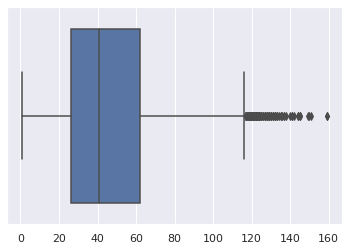

In [ ]:
result = [len(x) for x in df['Short description']]
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result)))
sns.boxplot(result)
plt.show()

Mean 204.03 words (519.642652)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


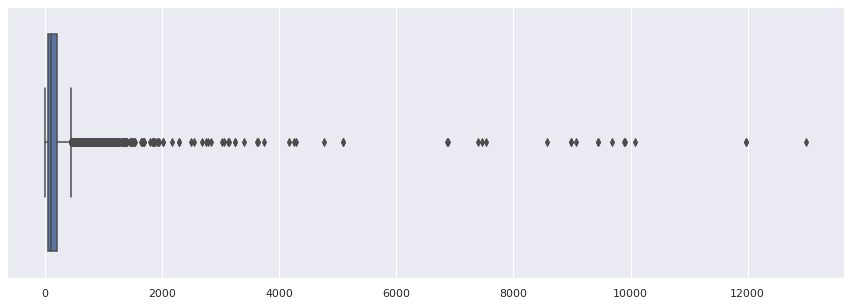

In [ ]:
plt.figure(figsize=[15,5])
result = [len(x) for x in df['Description']]
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result)))
sns.boxplot(result)
plt.show()

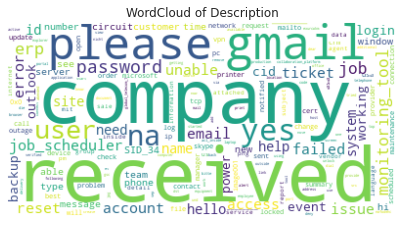

In [ ]:
#Creating the text variable
text = " ".join(df['Description'])
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.figure(figsize=(7,7))
plt.title("WordCloud of Description")
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

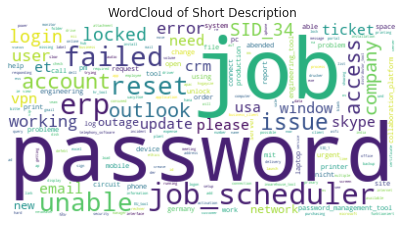

In [ ]:
#Creating the text variable
text = " ".join(df['Short description'])
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.figure(figsize=(7,7))
plt.title("WordCloud of Short Description")
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

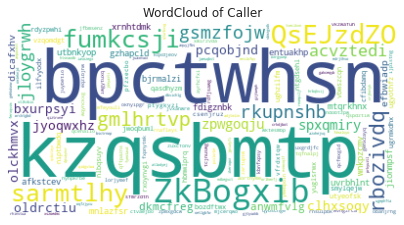

In [ ]:
#Creating the text variable
text = " ".join(df['Caller'])
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.figure(figsize=(7,7))
plt.title("WordCloud of Caller")
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

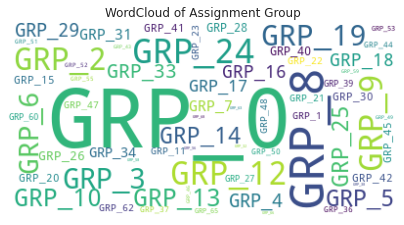

In [ ]:
#Creating the text variable
text = " ".join(df['Assignment group'])
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.figure(figsize=(7,7))
plt.title("WordCloud of Assignment Group")
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
df['Assignment group'].value_counts()

GRP_0     3976
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
          ... 
GRP_61       1
GRP_35       1
GRP_70       1
GRP_64       1
GRP_73       1
Name: Assignment group, Length: 74, dtype: int64

In [ ]:
dffilter = df.groupby("Assignment group").filter(lambda x: len(x) > 100)
dffilter.shape

(7030, 4)

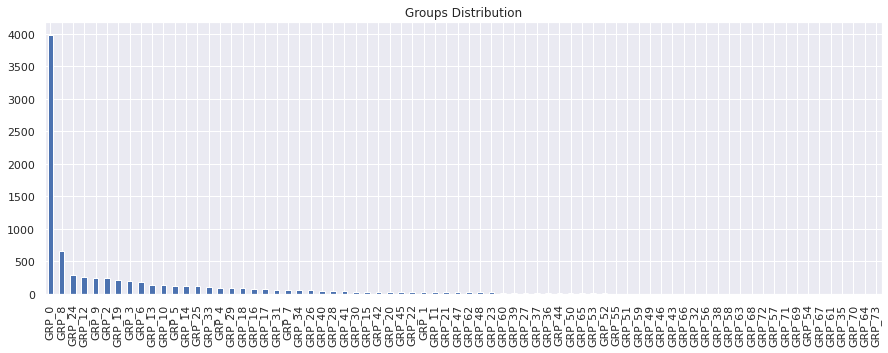

In [ ]:
df['Assignment group'].value_counts().plot(kind='bar', figsize=(15,5), title='Groups Distribution')

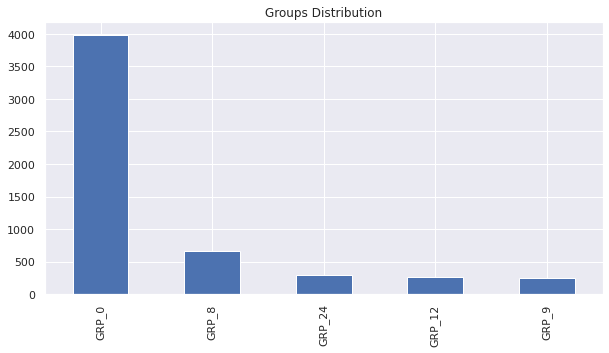

In [ ]:
df['Assignment group'].value_counts()[0:5].plot(kind='bar',figsize=(10,5), title='Groups Distribution')

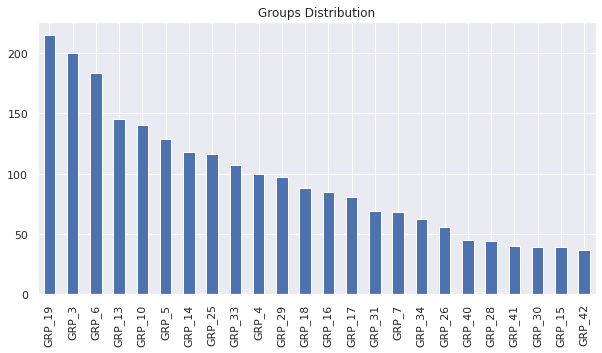

In [ ]:
df['Assignment group'].value_counts()[6:30].plot(kind='bar', figsize=(10,5), title='Groups Distribution')

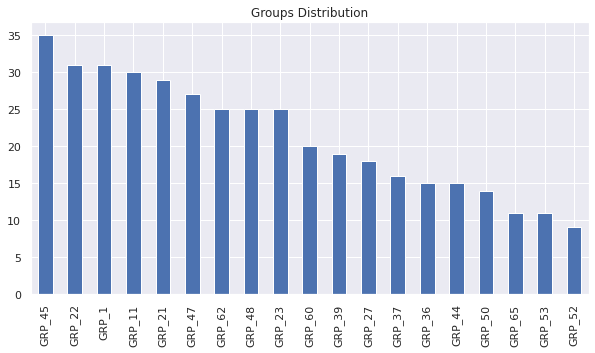

In [ ]:
df['Assignment group'].value_counts()[31:50].plot(kind='bar', figsize=(10,5), title='Groups Distribution')

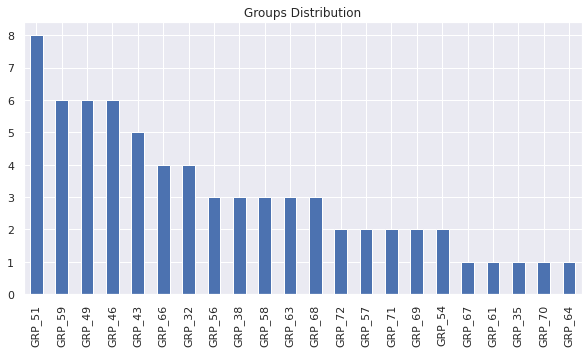

In [ ]:
df['Assignment group'].value_counts()[51:73].plot(kind='bar', figsize=(10,5), title='Groups Distribution')

In [ ]:
agunique = df['Assignment group'].unique()
agunique.shape

(74,)

In [ ]:
unique = df['Caller'].unique()
unique.shape

(2950,)

In [ ]:
df['Caller'].value_counts()

bpctwhsn kzqsbmtp    810
ZkBogxib QsEJzdZO    151
fumkcsji sarmtlhy    134
rbozivdq gmlhrtvp     87
rkupnshb gsmzfojw     71
                    ... 
ugvkyalo ayofwjpi      1
pzkxsnmv aoybmnzw      1
lxgtvwyh jnkchfap      1
ktcvsagx vftapxuc      1
sabufdcz rbkvlhpo      1
Name: Caller, Length: 2950, dtype: int64

[]

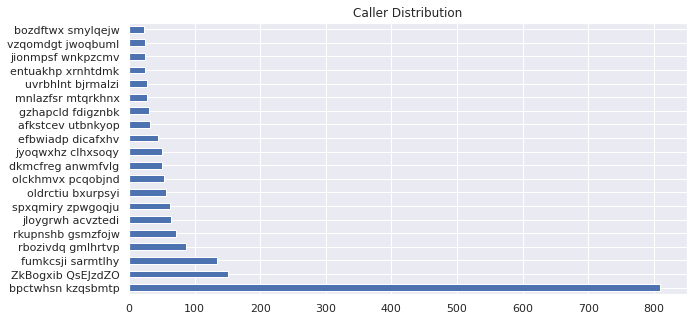

In [ ]:
# Top 20 callers
df['Caller'].value_counts()[0:20].plot(kind='barh', figsize=(10,5), title='Caller Distribution')
plt.plot()

In [ ]:
subsetdf = df.loc[(df["Caller"] == "bpctwhsn kzqsbmtp")]


In [ ]:
subsetdf

,Short description,Description,Caller,Assignment group
47,job Job_1424 failed in job_scheduler at: 10/31...,received from: monitoring_tool@company.com\r\n...,bpctwhsn kzqsbmtp,GRP_6
50,job mm_zscr0099_dly_merktc3 failed in job_sche...,received from: monitoring_tool@company.com\r\n...,bpctwhsn kzqsbmtp,GRP_8
59,job mm_zscr0099_dly_merktc2 failed in job_sche...,received from: monitoring_tool@company.com\r\n...,bpctwhsn kzqsbmtp,GRP_8
60,job Job_3181 failed in job_scheduler at: 10/31...,received from: monitoring_tool@company.com\r\n...,bpctwhsn kzqsbmtp,GRP_8
67,job Job_1338 failed in job_scheduler at: 10/31...,received from: monitoring_tool@company.com\r\n...,bpctwhsn kzqsbmtp,GRP_9
...,...,...,...,...
7053,job Job_1387 failed in job_scheduler at: 08/18...,received from: monitoring_tool@company.com\r\n...,bpctwhsn kzqsbmtp,GRP_9
7059,job Job_2063b failed in job_scheduler at: 08/1...,received from: monitoring_tool@company.com\r\n...,bpctwhsn kzqsbmtp,GRP_6
7074,job HostName_1019fail failed in job_scheduler ...,received from: monitoring_tool@company.com\r\n...,bpctwhsn kzqsbmtp,GRP_8
7076,job HostName_1019fail failed in job_scheduler ...,received from: monitoring_tool@company.com\r\n...,bpctwhsn kzqsbmtp,GRP_8


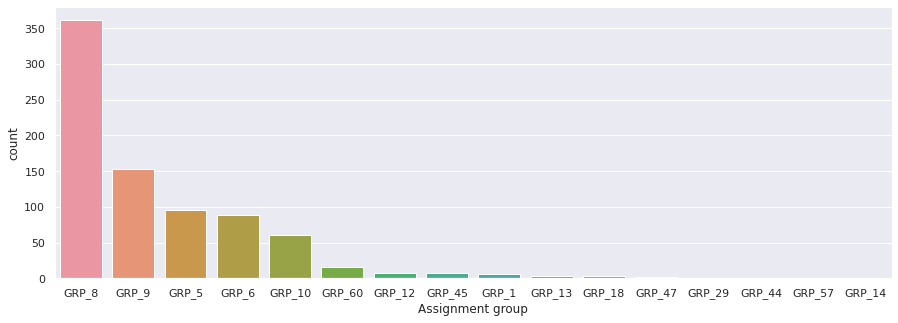

In [ ]:
plt.figure(figsize=[15,5])
#sns.countplot(subsetdf['Assignment group'],order=ascending)
sns.countplot(x = 'Assignment group',
              data = subsetdf,
              order = subsetdf['Assignment group'].value_counts().index)
plt.show()

In [ ]:
df

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0
...,...,...,...,...
8495,emails not coming in from zz mail,\r\n\r\nreceived from: avglmrts.vhqmtiua@gmail...,avglmrts vhqmtiua,GRP_29
8496,telephony_software issue,telephony_software issue,rbozivdq gmlhrtvp,GRP_0
8497,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0
8498,machine nÃ£o estÃ¡ funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,GRP_62


In [ ]:
#df['CombinedDescription'] = df['Short description'].str.cat(df['Description'], sep=' ', na_rep=' ')

In [ ]:
def convertToLower(data, regex):
    return data.str.lower().str.replace(regex.lower(), ' ')

In [ ]:
def sanitizeDataset(dataset, columnsToSanitize, regexList):
    for column in columnsToSanitize:
        for regex in regexList:
            dataset[column] = convertToLower(dataset[column], regex)
    return dataset

In [ ]:
def getRegularexpressionList():
   
    regularexList = []
    regularexList += ['From:(.*)\r\n']  # from
    regularexList += ['Sent:(.*)\r\n']  # sent
    regularexList += ['received from:(.*)\r\n']  # received from
    regularexList += ['received']  # received
    regularexList += ['To:(.*)\r\n']  # to
    regularexList += ['CC:(.*)\r\n']  # cc
    regularexList += ['(.*)infection']  # footer
    regularexList += ['\[cid:(.*)]']  # cid images
    regularexList += ['https?:[^\]\n\r]+']  # https & http
    regularexList += ['Subject:'] # subject
    regularexList += ['[\w\d\-\_\.]+@[\w\d\-\_\.]+']  # emails
    regularexList += ['[0-9][\-0–90-9 ]+']  # phone numbers
    regularexList += ['[0-9]']  # numbers
    regularexList += ['[^a-zA-z 0-9]+']  # non alphanumberic
    regularexList += ['[\r\n]']  # \r\n # tab & new line
    regularexList += [' [a-zA-Z] ']  # single letters
    regularexList += [' [a-zA-Z][a-zA-Z] ']  # two-letter words
    regularexList += ["  "]  # double spaces
    
    regularexList += ['^[_a-z0-9-]+(\.[_a-z0-9-]+)*@[a-z0-9-]+(\.[a-z0-9-]+)*(\.[a-z]{2,4})$'] #email address
    regularexList += ['[\w\d\-\_\.]+ @ [\w\d\-\_\.]+']
    regularexList += ['Subject:']
    #regularexList += ['[^a-zA-Z]']

    return regularexList

In [ ]:
# Clean Short Description & Description separately
mods_df = sanitizeDataset(df, ['Short description'], getRegularexpressionList())
modd_df = sanitizeDataset(mods_df, ['Description'], getRegularexpressionList())

In [ ]:
Counter(" ".join(modd_df["Short description"]).split()).most_common(10)

[('job', 2510),
 ('password', 1043),
 ('not', 981),
 ('scheduler', 959),
 ('erp', 885),
 ('failed', 828),
 ('for', 746),
 ('tool', 734),
 ('the', 714),
 ('unable', 713)]

In [ ]:
Counter(" ".join(modd_df["Description"]).split()).most_common(10)

[('the', 6295),
 ('job', 2550),
 ('and', 2383),
 ('yes', 2027),
 ('not', 1961),
 ('please', 1951),
 ('for', 1888),
 ('na', 1574),
 ('from', 1459),
 ('this', 1453)]

In [ ]:
modd_df.head()

,Short description,Description,Caller,Assignment group
0,login issue,verified user details employee manager name ...,spxjnwir pjlcoqds,GRP_0
1,outlook,hello team meetings skype meetings etc are ...,hmjdrvpb komuaywn,GRP_0
2,cant log to vpn,cannot log to vpn best,eylqgodm ybqkwiam,GRP_0
3,unable access tool page,unable access tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [ ]:
# Load the wrapper
nlp = spacy.load('en_use_md')

#df.drop("spacy_score", axis=1)
modd_df.insert(3, 'spacy_score', '0')

# Calcuate the Spacy Score for each row between Short Description and Description
for i in modd_df.index:
  modd_df.spacy_score[i] = round(nlp(modd_df.values[i][0]).similarity(nlp(modd_df.values[i][1])),1)
  

Downloaded https://tfhub.dev/google/universal-sentence-encoder/4, Total size: 987.47MB



In [ ]:
modd_df

,Short description,Description,Caller,spacy_score,Assignment group
0,login issue,verified user details employee manager name ...,spxjnwir pjlcoqds,0.3,GRP_0
1,outlook,hello team meetings skype meetings etc are ...,hmjdrvpb komuaywn,0.3,GRP_0
2,cant log to vpn,cannot log to vpn best,eylqgodm ybqkwiam,0.9,GRP_0
3,unable access tool page,unable access tool page,xbkucsvz gcpydteq,1,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,1,GRP_0
...,...,...,...,...,...
8495,emails not coming from mail,good afternoon not receiving the emails tha...,avglmrts vhqmtiua,0.7,GRP_29
8496,telephony software issue,telephony software issue,rbozivdq gmlhrtvp,1,GRP_0
8497,vip windows password reset for tifpdchb pedxruyf,vip windows password reset for tifpdchb pedxruyf,oybwdsgx oxyhwrfz,1,GRP_0
8498,machine o est funcionando,i unable access the machine utilities finish t...,ufawcgob aowhxjky,0.1,GRP_62


In [ ]:
# selecting rows based on condition 
rslt_df = modd_df[modd_df['spacy_score'] == 1.0]
rslt_df

,Short description,Description,Caller,spacy_score,Assignment group
3,unable access tool page,unable access tool page,xbkucsvz gcpydteq,1,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,1,GRP_0
5,unable log to engineering tool and skype,unable log to engineering tool and skype,eflahbxn ltdgrvkz,1,GRP_0
7,ticket employment status new non employee ent...,ticket employment status new non employee ent...,eqzibjhw ymebpoih,1,GRP_0
8,unable disable add ins outlook,unable disable add ins outlook,mdbegvct dbvichlg,1,GRP_0
...,...,...,...,...,...
8489,account locked,account locked,sdvlxbfe ptnahjkw,1,GRP_0
8492,hr tool etime option not visitble,hr tool etime option not visitble,tmopbken ibzougsd,1,GRP_0
8494,tablet needs reimaged due multiple issues with...,tablet needs reimaged due multiple issues with...,cpmaidhj elbaqmtp,1,GRP_3
8496,telephony software issue,telephony software issue,rbozivdq gmlhrtvp,1,GRP_0


In [ ]:
modd_df.insert(4, 'CombinedDescription', '0')

In [ ]:
# Combine Description and Short Description text based on the Spacy Score
for i in modd_df.index:
    if modd_df.spacy_score[i] == 1.0:
       modd_df.CombinedDescription[i] = str(modd_df['Short description'][i])
    else:
       modd_df.CombinedDescription[i] = str(modd_df['Short description'][i]) + str(modd_df.Description[i])

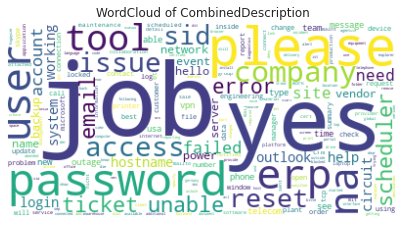

In [ ]:
#Creating the text variable
text = " ".join(modd_df['CombinedDescription'])
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.figure(figsize=(7,7))
plt.title("WordCloud of CombinedDescription")
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
modd_df['SanitizedDescription'] = modd_df['CombinedDescription']
mod_df = sanitizeDataset(modd_df, ['SanitizedDescription'], getRegularexpressionList())

In [ ]:
mod_df

,Short description,Description,Caller,spacy_score,CombinedDescription,Assignment group,SanitizedDescription
0,login issue,verified user details employee manager name ...,spxjnwir pjlcoqds,0.3,login issue verified user details employee ma...,GRP_0,login issue verified user details employee man...
1,outlook,hello team meetings skype meetings etc are ...,hmjdrvpb komuaywn,0.3,outlook hello team meetings skype meetings e...,GRP_0,outlook hello team meetings skype meetings et...
2,cant log to vpn,cannot log to vpn best,eylqgodm ybqkwiam,0.9,cant log to vpn cannot log to vpn best,GRP_0,cant log vpn cannot log vpn best
3,unable access tool page,unable access tool page,xbkucsvz gcpydteq,1,unable access tool page,GRP_0,unable access tool page
4,skype error,skype error,owlgqjme qhcozdfx,1,skype error,GRP_0,skype error
...,...,...,...,...,...,...,...
8495,emails not coming from mail,good afternoon not receiving the emails tha...,avglmrts vhqmtiua,0.7,emails not coming from mail good afternoon n...,GRP_29,emails not coming from mail good afternoon no...
8496,telephony software issue,telephony software issue,rbozivdq gmlhrtvp,1,telephony software issue,GRP_0,telephony software issue
8497,vip windows password reset for tifpdchb pedxruyf,vip windows password reset for tifpdchb pedxruyf,oybwdsgx oxyhwrfz,1,vip windows password reset for tifpdchb pedxruyf,GRP_0,vip windows password reset for tifpdchb pedxruyf
8498,machine o est funcionando,i unable access the machine utilities finish t...,ufawcgob aowhxjky,0.1,machine o est funcionandoi unable access the m...,GRP_62,machine est funcionandoi unable access the mac...


In [ ]:
mod_df.to_csv('/content/drive/MyDrive/Colab Notebooks/moddf5.csv')

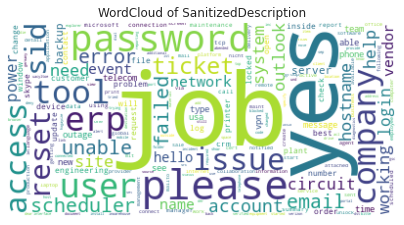

In [ ]:
#Creating the text variable
text = " ".join(mod_df['SanitizedDescription'])
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.figure(figsize=(7,7))
plt.title("WordCloud of SanitizedDescription")
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
  mod_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/moddf5.csv')
  mod_df.head()

,Unnamed: 0,Short description,Description,Caller,spacy_score,CombinedDescription,Assignment group,SanitizedDescription
0,0,login issue,verified user details employee manager name ...,spxjnwir pjlcoqds,0.3,login issue verified user details employee ma...,GRP_0,login issue verified user details employee man...
1,1,outlook,hello team meetings skype meetings etc are ...,hmjdrvpb komuaywn,0.3,outlook hello team meetings skype meetings e...,GRP_0,outlook hello team meetings skype meetings et...
2,2,cant log to vpn,cannot log to vpn best,eylqgodm ybqkwiam,0.9,cant log to vpn cannot log to vpn best,GRP_0,cant log vpn cannot log vpn best
3,3,unable access tool page,unable access tool page,xbkucsvz gcpydteq,1.0,unable access tool page,GRP_0,unable access tool page
4,4,skype error,skype error,owlgqjme qhcozdfx,1.0,skype error,GRP_0,skype error


In [ ]:
sanitized = mod_df['SanitizedDescription']

In [ ]:
 languages_langdetect = []
 languagetranslated = []
 for line in sanitized:
     try:
         result = langdetect.detect_langs(line)
         result = str(result[0])[:2]
         
     except:
         result = 'unknown'
    
     finally:
         languages_langdetect.append(result)
         #languagetranslated.append(line)

In [ ]:
mod_df['languages_langdetect'] = languages_langdetect
#langdetectdf = mod_df['languages_langdetect']

In [ ]:
mod_df.to_csv('/content/drive/MyDrive/Colab Notebooks/languagedetected.csv')

In [ ]:
mod_df.insert(5, 'TranslatedDescription', '0')

In [ ]:
mod_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/languagedetected.csv')
mod_df.head()

,Unnamed: 0,Unnamed: 0.1,Short description,Description,Caller,spacy_score,CombinedDescription,Assignment group,SanitizedDescription,languages_langdetect
0,0,0,login issue,verified user details employee manager name ...,spxjnwir pjlcoqds,0.3,login issue verified user details employee ma...,GRP_0,login issue verified user details employee man...,en
1,1,1,outlook,hello team meetings skype meetings etc are ...,hmjdrvpb komuaywn,0.3,outlook hello team meetings skype meetings e...,GRP_0,outlook hello team meetings skype meetings et...,en
2,2,2,cant log to vpn,cannot log to vpn best,eylqgodm ybqkwiam,0.9,cant log to vpn cannot log to vpn best,GRP_0,cant log vpn cannot log vpn best,no
3,3,3,unable access tool page,unable access tool page,xbkucsvz gcpydteq,1.0,unable access tool page,GRP_0,unable access tool page,it
4,4,4,skype error,skype error,owlgqjme qhcozdfx,1.0,skype error,GRP_0,skype error,no


In [ ]:
import itertools
language_translate = []

#for line in langdetectdf:
for index, row in mod_df.iterrows():
    try:
        if (row['languages_langdetect'] == 'de') :
           blob = TextBlob(row['SanitizedDescription'])
           output = blob.translate(to='en')
           #gs = goslate.Goslate()
           #output = gs.translate(row['SanitizedDescription'], 'en')
           #translator = Translator()
           #output = translator.translate(row['SanitizedDescription'] , dest ='en').text
          #  translator= Translator(to_lang="English")
          #  output = translator.translate(row['SanitizedDescription'])
           language_translate.append(output)
        else :
           language_translate.append(row['SanitizedDescription'])
    except:
        output = 'unknown'
        print(output)
        language_translate.append(output)
    
    # finally:
    #     language_translate.append(row['SanitizedDescription'])

unknown
unknown
unknown
unknown


In [ ]:
#df["First season"] = df["First season"].apply(lambda x : 1 if x > 1990 else x)
#df.loc[mod_df.languages_langdetect == "de", "SanitizedDescription"] = method()

In [ ]:
mod_df['TranslatedDescription'] = language_translate

In [ ]:
mod_df.head()

,Unnamed: 0,Unnamed: 0.1,Short description,Description,Caller,spacy_score,CombinedDescription,Assignment group,SanitizedDescription,languages_langdetect,TranslatedDescription
0,0,0,login issue,verified user details employee manager name ...,spxjnwir pjlcoqds,0.3,login issue verified user details employee ma...,GRP_0,login issue verified user details employee man...,en,login issue verified user details employee man...
1,1,1,outlook,hello team meetings skype meetings etc are ...,hmjdrvpb komuaywn,0.3,outlook hello team meetings skype meetings e...,GRP_0,outlook hello team meetings skype meetings et...,en,outlook hello team meetings skype meetings et...
2,2,2,cant log to vpn,cannot log to vpn best,eylqgodm ybqkwiam,0.9,cant log to vpn cannot log to vpn best,GRP_0,cant log vpn cannot log vpn best,no,cant log vpn cannot log vpn best
3,3,3,unable access tool page,unable access tool page,xbkucsvz gcpydteq,1.0,unable access tool page,GRP_0,unable access tool page,it,unable access tool page
4,4,4,skype error,skype error,owlgqjme qhcozdfx,1.0,skype error,GRP_0,skype error,no,skype error


In [ ]:
mod_df['languages_langdetect'].unique()

array(['en', 'no', 'it', 'fr', 'sv', 'af', 'da', 'ca', 'sl', 'es', 'nl',
       'id', 'de', 'pl', 'cy', 'hr', 'et', 'ro', 'tl', 'sq', 'unknown',
       'pt', 'lt', 'vi', 'cs', 'lv', 'so', 'sk', 'fi', 'hu'], dtype=object)

In [ ]:
mod_df.to_csv('/content/drive/MyDrive/Colab Notebooks/translateddf.csv')

In [ ]:
mod_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/translateddf.csv')
mod_df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Short description,Description,Caller,spacy_score,CombinedDescription,Assignment group,SanitizedDescription,languages_langdetect,TranslatedDescription
0,0,0,0,login issue,verified user details employee manager name ...,spxjnwir pjlcoqds,0.3,login issue verified user details employee ma...,GRP_0,login issue verified user details employee man...,en,login issue verified user details employee man...
1,1,1,1,outlook,hello team meetings skype meetings etc are ...,hmjdrvpb komuaywn,0.3,outlook hello team meetings skype meetings e...,GRP_0,outlook hello team meetings skype meetings et...,en,outlook hello team meetings skype meetings et...
2,2,2,2,cant log to vpn,cannot log to vpn best,eylqgodm ybqkwiam,0.9,cant log to vpn cannot log to vpn best,GRP_0,cant log vpn cannot log vpn best,no,cant log vpn cannot log vpn best
3,3,3,3,unable access tool page,unable access tool page,xbkucsvz gcpydteq,1.0,unable access tool page,GRP_0,unable access tool page,it,unable access tool page
4,4,4,4,skype error,skype error,owlgqjme qhcozdfx,1.0,skype error,GRP_0,skype error,no,skype error


In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
caller_list = mod_df["Caller"].unique().tolist()

In [ ]:
new_items = []
for item in caller_list:
    new_items.extend(item.split())

In [ ]:
cleandocs = list()
for desc in mod_df['TranslatedDescription']:
   
    wt = word_tokenize(desc) 
    
    filterdoc = [] 

    # Removing Stopwords
    for w in wt: 
        if w not in stop_words: 
            filterdoc.append(w) 
    
    # Lemmetization
    lemma_word = []
    wnl = WordNetLemmatizer()
    for w in filterdoc:
        word1 = wnl.lemmatize(w, pos = "n")
        word2 = wnl.lemmatize(word1, pos = "v")
        word3 = wnl.lemmatize(word2, pos = ("a"))
        lemma_word.append(word3)
    words = ' '.join(lemma_word)
    cleandocs.append(words)

In [ ]:
mod_df['TranslatedDescription'] = cleandocs

In [ ]:
mod_df = sanitizeDataset(mod_df, ['TranslatedDescription'], getRegularexpressionList())

In [ ]:
removecaller = list()
count = int(0)
for call in mod_df['TranslatedDescription']:
    weight = word_tokenize(call) 
    
    filtercalldoc = [] 

    # Removing Callers
    for wd in weight: 
        if wd not in new_items: 
            filtercalldoc.append(wd) 
        else : 
            #print (call)
            count = count+1
print(count)

2479


In [ ]:
mod_df['TranslatedDescription']

0       login issue verify user detail employee manage...
1       outlook hello team meet skype meet etc appear ...
2                               cant log vpn log vpn best
3                                 unable access tool page
4                                             skype error
                              ...                        
8495    email come mail good afternoon receive email s...
8496                             telephony software issue
8497          vip window password reset tifpdchb pedxruyf
8498    machine est funcionandoi unable access machine...
8499    different program type open several different ...
Name: TranslatedDescription, Length: 8500, dtype: object

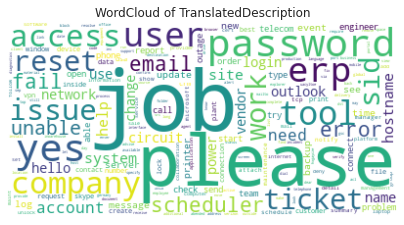

In [ ]:
#Creating the text variable
text = " ".join(mod_df['TranslatedDescription'])
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.figure(figsize=(7,7))
plt.title("WordCloud of TranslatedDescription")
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
Counter(" ".join(mod_df["TranslatedDescription"]).split()).most_common(10)

[('job', 2700),
 ('please', 2168),
 ('password', 2062),
 ('yes', 2027),
 ('erp', 1672),
 ('user', 1575),
 ('tool', 1516),
 ('company', 1473),
 ('access', 1374),
 ('issue', 1277)]

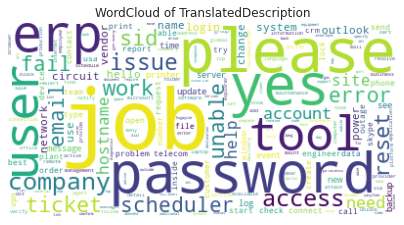

In [ ]:
#Creating the text variable
text = " ".join(mod_df['TranslatedDescription'])
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.figure(figsize=(7,7))
plt.title("WordCloud of TranslatedDescription")
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
totalbefore = mod_df['TranslatedDescription'].str.split().str.len()

In [ ]:
totalbefore.sum()

153564

In [ ]:
from collections import OrderedDict

mod_df['TranslatedDescription'] = (mod_df['TranslatedDescription'].str.split()
                              .apply(lambda x: OrderedDict.fromkeys(x).keys())
                              .str.join(' '))

In [ ]:
totalafter = mod_df['TranslatedDescription'].str.split().str.len()

In [ ]:
totalafter.sum()

107969

In [ ]:
(totalbefore.sum() - totalafter.sum())

45595

Mean 88.59 words (136.999666)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


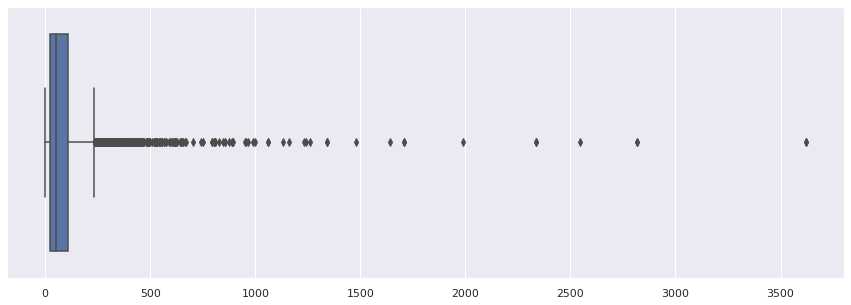

In [ ]:
plt.figure(figsize=[15,5])
result = [len(x) for x in mod_df['TranslatedDescription']]
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result)))
sns.boxplot(result)
plt.show()

In [ ]:
mod_df.shape

(8500, 12)

In [ ]:
mod_df = mod_df[mod_df['languages_langdetect'] != 'unknown']
mod_df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Short description,Description,Caller,spacy_score,CombinedDescription,Assignment group,SanitizedDescription,languages_langdetect,TranslatedDescription
0,0,0,0,login issue,verified user details employee manager name ...,spxjnwir pjlcoqds,0.3,login issue verified user details employee ma...,GRP_0,login issue verified user details employee man...,en,login issue verify user detail employee manage...
1,1,1,1,outlook,hello team meetings skype meetings etc are ...,hmjdrvpb komuaywn,0.3,outlook hello team meetings skype meetings e...,GRP_0,outlook hello team meetings skype meetings et...,en,outlook hello team meet skype etc appear calen...
2,2,2,2,cant log to vpn,cannot log to vpn best,eylqgodm ybqkwiam,0.9,cant log to vpn cannot log to vpn best,GRP_0,cant log vpn cannot log vpn best,no,cant log vpn best
3,3,3,3,unable access tool page,unable access tool page,xbkucsvz gcpydteq,1.0,unable access tool page,GRP_0,unable access tool page,it,unable access tool page
4,4,4,4,skype error,skype error,owlgqjme qhcozdfx,1.0,skype error,GRP_0,skype error,no,skype error
...,...,...,...,...,...,...,...,...,...,...,...,...
8495,8495,8495,8495,emails not coming from mail,good afternoon not receiving the emails tha...,avglmrts vhqmtiua,0.7,emails not coming from mail good afternoon n...,GRP_29,emails not coming from mail good afternoon no...,en,email come mail good afternoon receive send pl...
8496,8496,8496,8496,telephony software issue,telephony software issue,rbozivdq gmlhrtvp,1.0,telephony software issue,GRP_0,telephony software issue,en,telephony software issue
8497,8497,8497,8497,vip windows password reset for tifpdchb pedxruyf,vip windows password reset for tifpdchb pedxruyf,oybwdsgx oxyhwrfz,1.0,vip windows password reset for tifpdchb pedxruyf,GRP_0,vip windows password reset for tifpdchb pedxruyf,en,vip window password reset tifpdchb pedxruyf
8498,8498,8498,8498,machine o est funcionando,i unable access the machine utilities finish t...,ufawcgob aowhxjky,0.1,machine o est funcionandoi unable access the m...,GRP_62,machine est funcionandoi unable access the mac...,en,machine est funcionandoi unable access utility...


In [ ]:
mod_df = mod_df[mod_df['SanitizedDescription']!='s']

In [ ]:
mod_df.shape

(8462, 12)

In [ ]:
subsetmod_df = mod_df[['TranslatedDescription', 'Assignment group']]

In [ ]:
subsetmod_df

,TranslatedDescription,Assignment group
0,login issue verify user detail employee manage...,GRP_0
1,outlook hello team meet skype etc appear calen...,GRP_0
2,cant log vpn best,GRP_0
3,unable access tool page,GRP_0
4,skype error,GRP_0
...,...,...
8495,email come mail good afternoon receive send pl...,GRP_29
8496,telephony software issue,GRP_0
8497,vip window password reset tifpdchb pedxruyf,GRP_0
8498,machine est funcionandoi unable access utility...,GRP_62


In [ ]:
duplicate = subsetmod_df[subsetmod_df.duplicated(['TranslatedDescription', 'Assignment group'])]
duplicate

,TranslatedDescription,Assignment group
15,ticket update inplant,GRP_0
40,ticket update inplant,GRP_0
51,call ecwtrjnq jpecxuty,GRP_0
59,job zscr dly merktc fail scheduler,GRP_8
68,job fail scheduler,GRP_8
...,...,...
8460,abended job scheduler,GRP_9
8462,abended job scheduler,GRP_9
8466,abended job scheduler bkwin hostname inc,GRP_8
8486,ticket update,GRP_0


In [ ]:
mod_df = subsetmod_df.drop_duplicates()

In [ ]:
mod_df

,TranslatedDescription,Assignment group
0,login issue verify user detail employee manage...,GRP_0
1,outlook hello team meet skype etc appear calen...,GRP_0
2,cant log vpn best,GRP_0
3,unable access tool page,GRP_0
4,skype error,GRP_0
...,...,...
8495,email come mail good afternoon receive send pl...,GRP_29
8496,telephony software issue,GRP_0
8497,vip window password reset tifpdchb pedxruyf,GRP_0
8498,machine est funcionandoi unable access utility...,GRP_62


In [ ]:
Counter(" ".join(mod_df["TranslatedDescription"]).split()).most_common(100)

[('please', 1755),
 ('erp', 890),
 ('issue', 876),
 ('tool', 873),
 ('work', 837),
 ('password', 813),
 ('user', 767),
 ('company', 747),
 ('access', 733),
 ('email', 733),
 ('unable', 714),
 ('need', 707),
 ('error', 684),
 ('reset', 640),
 ('hello', 615),
 ('help', 592),
 ('get', 577),
 ('use', 503),
 ('system', 500),
 ('ticket', 465),
 ('sid', 457),
 ('account', 448),
 ('message', 442),
 ('see', 422),
 ('outlook', 420),
 ('team', 386),
 ('phone', 378),
 ('new', 377),
 ('check', 376),
 ('try', 375),
 ('name', 372),
 ('contact', 369),
 ('change', 368),
 ('hostname', 366),
 ('login', 360),
 ('network', 355),
 ('able', 351),
 ('open', 347),
 ('best', 346),
 ('number', 346),
 ('time', 339),
 ('customer', 336),
 ('log', 335),
 ('problem', 332),
 ('send', 328),
 ('connect', 319),
 ('attach', 311),
 ('since', 302),
 ('server', 299),
 ('summary', 294),
 ('engineer', 292),
 ('update', 289),
 ('report', 283),
 ('request', 281),
 ('start', 275),
 ('call', 273),
 ('usa', 272),
 ('microsoft', 263

In [ ]:
#thislist = ['see', 'help', 'also', 'dear','could','since','able','please','sir','yes','hello', 'good morning', 'good afternoon', 'good day','company','need','na','try','me','un','r']
#list = ['please','hello']
# for x in list:
#    print(x)
#mod_df = mod_df["TranslatedDescription"].str.replace('please',"")
mod_df['TranslatedDescription'] = mod_df['TranslatedDescription'].str.replace('please', '')
mod_df['TranslatedDescription'] = mod_df['TranslatedDescription'].str.replace('see', '')
mod_df['TranslatedDescription'] = mod_df['TranslatedDescription'].str.replace('help', '')
mod_df['TranslatedDescription'] = mod_df['TranslatedDescription'].str.replace('also', '')
mod_df['TranslatedDescription'] = mod_df['TranslatedDescription'].str.replace('dear', '')
mod_df['TranslatedDescription'] = mod_df['TranslatedDescription'].str.replace('could', '')
mod_df['TranslatedDescription'] = mod_df['TranslatedDescription'].str.replace('since', '')
mod_df['TranslatedDescription'] = mod_df['TranslatedDescription'].str.replace('able', '')
mod_df['TranslatedDescription'] = mod_df['TranslatedDescription'].str.replace('sir', '')
mod_df['TranslatedDescription'] = mod_df['TranslatedDescription'].str.replace('yes', '')
mod_df['TranslatedDescription'] = mod_df['TranslatedDescription'].str.replace('hello', '')
mod_df['TranslatedDescription'] = mod_df['TranslatedDescription'].str.replace('good morning', '')
mod_df['TranslatedDescription'] = mod_df['TranslatedDescription'].str.replace('good afternoon', '')
mod_df['TranslatedDescription'] = mod_df['TranslatedDescription'].str.replace('good day', '')
mod_df['TranslatedDescription'] = mod_df['TranslatedDescription'].str.replace('company', '')
mod_df['TranslatedDescription'] = mod_df['TranslatedDescription'].str.replace('need', '')
mod_df['TranslatedDescription'] = mod_df['TranslatedDescription'].str.replace('na', '')
mod_df['TranslatedDescription'] = mod_df['TranslatedDescription'].str.replace('try', '')
mod_df['TranslatedDescription'] = mod_df['TranslatedDescription'].str.replace('me', '')
mod_df['TranslatedDescription'] = mod_df['TranslatedDescription'].str.replace('un', '')
mod_df['TranslatedDescription'] = mod_df['TranslatedDescription'].str.replace('r', '')

In [ ]:
Counter(" ".join(mod_df["TranslatedDescription"]).split()).most_common(100)

[('use', 1312),
 ('ep', 918),
 ('tool', 886),
 ('issue', 884),
 ('wok', 840),
 ('passwod', 820),
 ('access', 740),
 ('email', 733),
 ('eo', 698),
 ('eset', 655),
 ('get', 577),
 ('system', 503),
 ('ticket', 466),
 ('sid', 457),
 ('accot', 450),
 ('ssage', 444),
 ('host', 433),
 ('outlook', 427),
 ('team', 388),
 ('lock', 385),
 ('phone', 380),
 ('contact', 378),
 ('new', 377),
 ('check', 376),
 ('change', 371),
 ('login', 364),
 ('netwok', 355),
 ('open', 348),
 ('ti', 348),
 ('best', 346),
 ('numbe', 346),
 ('schedule', 345),
 ('custo', 337),
 ('poblem', 336),
 ('log', 335),
 ('send', 328),
 ('connect', 319),
 ('povide', 314),
 ('attach', 311),
 ('seve', 310),
 ('summay', 294),
 ('enginee', 292),
 ('update', 290),
 ('epot', 286),
 ('equest', 282),
 ('stat', 278),
 ('call', 273),
 ('usa', 272),
 ('mage', 266),
 ('micosoft', 263),
 ('site', 258),
 ('ceate', 254),
 ('type', 252),
 ('vpn', 251),
 ('cm', 248),
 ('follow', 248),
 ('ode', 247),
 ('show', 244),
 ('intenet', 244),
 ('job', 235

In [ ]:
mod_df.head()

,TranslatedDescription,Assignment group
0,login issue veify use detail employee mage ch...,GRP_0
1,outlook team et skype etc appea calenda sobod...,GRP_0
2,cant log vpn best,GRP_0
3,access tool page,GRP_0
4,skype eo,GRP_0


In [ ]:
mod_df.to_csv('/content/drive/MyDrive/Colab Notebooks/sanitizedlemmatranclean.csv')